In [1]:
# https://www.kaggle.com/datasets/deepak711/4-subject-data-text-classification

In [53]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import spacy
from pprint import pprint
import pandas as pd
import os
import numpy as np

from tqdm import tqdm

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

In [3]:
def find_txt_files(directory):
    txt_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                txt_files.append(os.path.join(root, file))
    return txt_files

In [4]:
def read_txt_file(file_path):
    try:
        with open(file_path, 'r', encoding="utf8") as file:
            file_contents = file.read()
        return file_contents
    except FileNotFoundError:
        return "File not found."

In [5]:
def sent_to_words(sentences):
    for sentence in tqdm(sentences):
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [6]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [7]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in tqdm(texts):
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [10]:
# category 1: Computer Science
directory_path = "data\\Seven Categories\\Computer_Science"
file_list = find_txt_files(directory_path)

names_ComputerScience = []
file_contents_ComputerScience = []
labels_ComputerScience = []
for file in file_list:
    names_ComputerScience.append(file.split("\\")[-1])
    file_contents_ComputerScience.append(read_txt_file(file))
    labels_ComputerScience.append("Computer Science")

In [12]:
# category 2: History
directory_path = "data\\Seven Categories\\History"
file_list = find_txt_files(directory_path)

names_History = []
file_contents_History = []
labels_History = []
for file in file_list:
    names_History.append(file.split("\\")[-1])
    file_contents_History.append(read_txt_file(file))
    labels_History.append("History")

In [14]:
# category 3: Maths
directory_path = "data\\Seven Categories\\Maths"
file_list = find_txt_files(directory_path)

names_Maths = []
file_contents_Maths = []
labels_Maths = []
for file in file_list:
    names_Maths.append(file.split("\\")[-1])
    file_contents_Maths.append(read_txt_file(file))
    labels_Maths.append("Maths")

In [15]:
# category 4: accounts
directory_path = "data\\Seven Categories\\Physics_Biology_Geography_Accounts subject training data for text classification\\train_data_final\\accounts"
file_list = find_txt_files(directory_path)

names_accounts = []
file_contents_accounts = []
labels_accounts = []
for file in file_list:
    names_accounts.append(file.split("\\")[-1])
    file_contents_accounts.append(read_txt_file(file))
    labels_accounts.append("accounts")

In [17]:
# category 5: physics
directory_path = "data\\Seven Categories\\Physics_Biology_Geography_Accounts subject training data for text classification\\train_data_final\\physics"
file_list = find_txt_files(directory_path)

names_physics = []
file_contents_physics = []
labels_physics = []
for file in file_list:
    names_physics.append(file.split("\\")[-1])
    file_contents_physics.append(read_txt_file(file))
    labels_physics.append("physics")

In [18]:
# category 6: geography
directory_path = "data\\Seven Categories\\Physics_Biology_Geography_Accounts subject training data for text classification\\train_data_final\\geography"
file_list = find_txt_files(directory_path)

names_geography = []
file_contents_geography = []
labels_geography = []
for file in file_list:
    names_geography.append(file.split("\\")[-1])
    file_contents_geography.append(read_txt_file(file))
    labels_geography.append("geography")

In [20]:
# category 7: biology
directory_path = "data\\Seven Categories\\Physics_Biology_Geography_Accounts subject training data for text classification\\train_data_final\\biology"
file_list = find_txt_files(directory_path)

names_biology = []
file_contents_biology = []
labels_biology = []
for file in file_list:
    names_biology.append(file.split("\\")[-1])
    file_contents_biology.append(read_txt_file(file))
    labels_biology.append("biology")

In [21]:
names = names_ComputerScience + names_History + names_Maths + names_accounts + names_physics + names_geography + names_biology

In [22]:
Y = labels_ComputerScience + labels_History + labels_Maths + labels_accounts + labels_physics + labels_geography + labels_biology

# Create a mapping between unique strings and integers
string_to_int = {string: index for index, string in enumerate(sorted(set(Y)))}

# Convert the list of strings to a list of integers using the mapping
Y_int_list = [string_to_int[string] for string in Y]

In [ ]:
print(file_contents_Maths[0])

In [23]:
data = file_contents_ComputerScience + file_contents_History + file_contents_Maths + file_contents_accounts + file_contents_physics + file_contents_geography + file_contents_biology
data_words = list(sent_to_words(data))

# Remove Stop Words
print("Start removing stop words")
data_words_nostops = remove_stopwords(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# conda install -c conda-forge spacy-model-en_core_web_sm
print("Installing spacy")
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
print("Start lemmatizing words")
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

100%|█████████████████████████████████████████████████████████████████████████████| 3142/3142 [00:03<00:00, 938.88it/s]


Start removing stop words
Installing spacy
Start lemmatizing words


100%|██████████████████████████████████████████████████████████████████████████████| 3142/3142 [00:50<00:00, 61.80it/s]


In [ ]:
print(data[0])
print(data_lemmatized[0])

In [24]:
data_lemmatized_min_length = []

for sublist in tqdm(data_lemmatized):
    # Use a list comprehension to filter out strings with less than two characters
    sublist = [word for word in sublist if len(word) > 2]
    data_lemmatized_min_length.append(sublist)

100%|███████████████████████████████████████████████████████████████████████████| 3142/3142 [00:00<00:00, 45491.90it/s]


In [25]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized_min_length)

# Create Corpus
texts = data_lemmatized_min_length

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 5), (3, 6), (4, 2), (5, 1), (6, 1), (7, 6), (8, 1), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 6), (18, 1), (19, 1), (20, 4), (21, 1), (22, 4), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 4), (29, 1), (30, 2), (31, 2), (32, 1), (33, 1), (34, 2), (35, 4), (36, 1), (37, 2), (38, 1), (39, 3), (40, 3), (41, 10), (42, 5), (43, 1), (44, 1), (45, 1), (46, 7), (47, 1), (48, 1), (49, 2), (50, 1), (51, 4), (52, 3), (53, 1), (54, 2)]]


### Topic Models

#### Vector Space Model

In [26]:
from scipy.sparse import dok_matrix

# Define function to convert Gensim corpus to a sparse pandas DataFrame
def corpus_to_sparse_dataframe(corpus):
    word_freq = dok_matrix((len(corpus), len(id2word)), dtype=int)

    for i, doc in enumerate(corpus):
        for word_id, freq in doc:
            word_freq[i, word_id] = freq

    dataframe = pd.DataFrame.sparse.from_spmatrix(word_freq)
    dataframe.columns = [id2word[word_id] for word_id in range(len(id2word))]
    return dataframe

In [27]:
VSM = corpus_to_sparse_dataframe(corpus)

#### Latent Dirichlet Allocation (LDA)

In [28]:
# Build LDA model
K = 7
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=K,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=400,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keywords in the 3 topics
pprint(lda_model.print_topics())

[(0,
  '0.010*"force" + 0.010*"energy" + 0.009*"charge" + 0.008*"current" + '
  '0.007*"give" + 0.006*"point" + 0.006*"fig" + 0.006*"time" + 0.006*"wave" + '
  '0.006*"light"'),
 (1,
  '0.019*"blood" + 0.019*"body" + 0.016*"call" + 0.013*"system" + '
  '0.012*"organ" + 0.012*"acceleration" + 0.011*"figure" + 0.009*"hormone" + '
  '0.008*"gland" + 0.008*"image"'),
 (2,
  '0.014*"cell" + 0.013*"plant" + 0.009*"water" + 0.006*"organism" + '
  '0.006*"also" + 0.006*"form" + 0.006*"one" + 0.005*"call" + 0.005*"dna" + '
  '0.005*"animal"'),
 (3,
  '0.007*"war" + 0.006*"new" + 0.005*"country" + 0.005*"united" + '
  '0.005*"become" + 0.005*"year" + 0.005*"state" + 0.005*"government" + '
  '0.004*"states" + 0.004*"soviet"'),
 (4,
  '0.038*"share" + 0.014*"issue" + 0.014*"call" + 0.013*"application" + '
  '0.012*"company" + 0.012*"time" + 0.012*"cache" + 0.011*"capital" + '
  '0.010*"per" + 0.009*"allotment"'),
 (5,
  '0.036*"number" + 0.017*"two" + 0.016*"point" + 0.013*"example" + '
  '0.010*"

In [29]:
rows = []
for doc in corpus:
    doc_top = []
    for t in lda_model.get_document_topics(doc, minimum_probability = 0):
        doc_top.append(t[1])
    rows.append(doc_top)

document_topic_matrix = pd.DataFrame(rows)
#document_topic_matrix_sourcecode["identifier"] = df_sourcecode.iloc[:,0].tolist()
document_topic_matrix

,0,1,2,3,4,5,6
0,0.002046,0.000399,0.011012,0.001376,0.000475,0.000615,0.984076
1,0.001236,0.000244,0.008009,0.037943,0.033582,0.074937,0.844050
2,0.001114,0.000222,0.000890,0.000766,0.039267,0.000342,0.957398
3,0.011645,0.000216,0.035170,0.013745,0.000256,0.033928,0.905041
4,0.001339,0.000270,0.001085,0.022074,0.049976,0.018689,0.906567
...,...,...,...,...,...,...,...
3137,0.091172,0.000203,0.754586,0.152991,0.000241,0.000312,0.000494
3138,0.058393,0.000201,0.703442,0.070138,0.040604,0.020563,0.106658
3139,0.071993,0.000457,0.802201,0.100124,0.000543,0.023570,0.001113
3140,0.065903,0.007367,0.826622,0.093088,0.000220,0.000285,0.006515


In [30]:
import time
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform, jensenshannon, cosine

#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, metric = jensenshannon)
tsne_results = tsne.fit_transform(document_topic_matrix.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 182.93520832061768 seconds


C:\Users\Daniel Atzberger\AppData\Local\Temp\ipykernel_24064\1226058344.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Paired'),


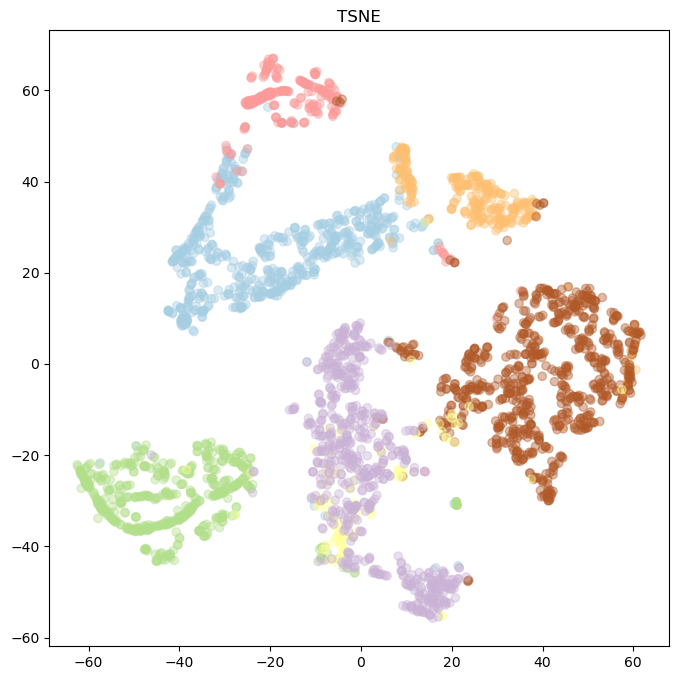

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=Y_int_list, 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=0.4)
plt.show()

In [34]:
x_list = tsne_results[:,0].tolist()
y_list = tsne_results[:,1].tolist()

### Pointwise Metrics

In [35]:
from scipy.spatial.distance import cdist

def pairwise_distance_matrix(point, distance_function="euclidean"):
	"""
	Compute the pairwise distance matrix of the point list
	You can use any distance function from scipy.spatial.distance.cdist or specify a callable function
	INPUT:
		ndarray: point: list of points
		str or callable: distance_function: distance function to use
	OUTPUT:
		ndarry: pairwise distance matrix 
	"""
	if callable(distance_function):
		distance_matrix = cdist(point, point, distance_function)
	else:
		distance_matrix = cdist(point, point, distance_function)
	return distance_matrix

In [36]:
import numpy as np
# import faiss
from sklearn.neighbors import KDTree

def knn_with_ranking(points, k, distance_function='euclidean'):
    """
    Compute the k-nearest neighbors of the points along with the 
    rankings of other points based on the distance to each point.
    If the distance matrix is not provided, it is computed in O(n^2) time.
    INPUT:
    	ndarray: points: list of points
        int: k: number of nearest neighbors to compute
    	ndarray: distance_matrix: pairwise distance matrix (Optional)
    OUTPUT:
    	ndarray: knn_indices: k-nearest neighbors of each point 
    	ndarray: ranking: ranking of other points based on the distance to each point
    """
    distance_matrix = pairwise_distance_matrix(points, distance_function)
    
    knn_indices = np.empty((points.shape[0], k), dtype=np.int32)
    ranking = np.empty((points.shape[0], points.shape[0]), dtype=np.int32)
      
    for i in range(points.shape[0]):
        distance_to_i = distance_matrix[i]
        sorted_indices = np.argsort(distance_to_i)
        knn_indices[i] = sorted_indices[1:k+1]
        ranking[i] = np.argsort(sorted_indices)
      
    return knn_indices, ranking
  

def knn(points, k, distance_function="euclidean"):
    """
    Compute the k-nearest neighbors of the points
    You can use any distance function supported by scikit-learn KD Tree or specify a callable function
    INPUT:
    	ndarray: points: list of points
    	int: k: number of nearest neighbors to compute
    	str or callable: distance_function: distance function to use
    OUTPUT:
    	ndarray: knn_indices: k-nearest neighbors of each point 
    """
    	
    ## make c-contiguous
    points = np.ascontiguousarray(points, dtype=np.float32)
    
    tree = KDTree(points, metric=distance_function)
    knn_indices = tree.query(points, k=k+1, return_distance=False)[:, 1:]
    	
    return knn_indices

In [37]:
def tnc_measure(orig, emb, k=20, return_local=False):
	"""
	Compute the trustworthiness and continuity of the embedding
	INPUT:
		ndarray: orig: original data
		ndarray: emb: embedded data
		int: k: number of nearest neighbors to consider
		tuple: knn_ranking_info: precomputed k-nearest neighbors and rankings of the original and embedded data (Optional)
	OUTPUT:
		dict: trustworthiness and continuity
	"""

	orig_knn_indices, orig_ranking = knn_with_ranking(orig, k, distance_function='cosine')
	emb_knn_indices,  emb_ranking  = knn_with_ranking(emb, k)

	if return_local:
		trust, local_trust = tnc_computation(orig_knn_indices, orig_ranking, emb_knn_indices, k, return_local)
		cont , local_cont  = tnc_computation(emb_knn_indices,  emb_ranking, orig_knn_indices, k, return_local)
		return ({
			"trustworthiness": trust,
			"continuity": cont
		}, {
			"local_trustworthiness": local_trust,
			"local_continuity": local_cont
		})
	else:
		trust = tnc_computation(orig_knn_indices, orig_ranking, emb_knn_indices, k, return_local)
		cont  = tnc_computation(emb_knn_indices,  emb_ranking, orig_knn_indices, k, return_local)
		return {
			"trustworthiness": trust,
			"continuity": cont
		}

def tnc_computation(base_knn_indices, base_ranking, target_knn_indices, k, return_local=False):
	"""
	Core computation of trustworthiness and continuity
	"""
	local_distortion_list = []
	points_num = base_knn_indices.shape[0]

	for i in range(points_num):
		missings = np.setdiff1d(target_knn_indices[i], base_knn_indices[i])
		local_distortion = 0.0 
		for missing in missings:
			local_distortion += base_ranking[i, missing] - k
		local_distortion_list.append(local_distortion)
	local_distortion_list = np.array(local_distortion_list)
	local_distortion_list = 1 - local_distortion_list * (2 / (k * (2 * points_num - 3 * k - 1)))

	average_distortion = np.mean(local_distortion_list)

	if return_local:
		return average_distortion, local_distortion_list
	else:
		return average_distortion

In [38]:
tnc = tnc_measure(VSM.values, tsne_results, k=7, return_local=True)

In [46]:
trustworthiness_list = tnc[1]['local_trustworthiness'].tolist()
continuity_list = tnc[1]['local_continuity'].tolist()

In [47]:
def mrre_measure(orig, emb, k=20, return_local=False):
	"""
	Compute Mean Relative Rank Error (MRRE) of the embedding
	INPUT:
		ndarray: orig: original data
		ndarray: emb: embedded data
		int: k: number of nearest neighbors to consider
		tuple: knn_ranking_info: precomputed k-nearest neighbors and rankings of the original and embedded data (Optional)
	OUTPUT:
		dict: MRRE_false and MRRE_missing
	"""
	orig_knn_indices, orig_ranking = knn_with_ranking(orig, k, distance_function='cosine')
	emb_knn_indices,  emb_ranking  = knn_with_ranking(emb, k)


	if return_local:
		mrre_false, local_mrre_false = mrre_computation(orig_ranking, emb_ranking, emb_knn_indices, k, return_local)
		mrre_missing, local_mrre_missing = mrre_computation(emb_ranking, orig_ranking, orig_knn_indices, k, return_local)
		return ({
			"mrre_false": mrre_false,
			"mrre_missing": mrre_missing
		}, {
			"local_mrre_false": local_mrre_false,
			"local_mrre_missing": local_mrre_missing
		})
	else:
		mrre_false = mrre_computation(orig_ranking, emb_ranking, emb_knn_indices, k, return_local)
		mrre_missing = mrre_computation(emb_ranking, orig_ranking, orig_knn_indices, k, return_local)

		return {
			"mrre_false": mrre_false,
			"mrre_missing": mrre_missing,
		}

def mrre_computation(base_ranking,target_ranking, target_knn_indices, k, return_local=False):
	"""
	Core computation of MRRE
	"""
	local_distortion_list = []
	points_num = target_knn_indices.shape[0]
	for i in range(points_num):
		base_rank_arr   = base_ranking[i][target_knn_indices[i]]
		target_rank_arr = target_ranking[i][target_knn_indices[i]]
		local_distortion_list.append(np.sum(np.abs(base_rank_arr - target_rank_arr) / target_rank_arr))
	
	c = sum([abs(points_num - 2 * i + 1) / i for i in range(1, k + 1)])
	local_distortion_list = np.array(local_distortion_list)
	local_distortion_list = 1 - local_distortion_list / c

	average_distortion = np.mean(local_distortion_list)

	if return_local:
		return average_distortion, local_distortion_list
	else:
		return average_distortion

In [49]:
mrre = mrre_measure(VSM.values, tsne_results, k=7, return_local=True)

In [50]:
mrre_false_list = mrre[1]['local_mrre_false'].tolist()
mrre_missing_list = mrre[1]['local_mrre_missing'].tolist()

In [64]:
from numpy import linalg as LA

def lcmc_measure(orig, emb, k=20, return_local=False):
    """
    Compute the local continuity meta-criteria of the embedding
    INPUT:
    	ndarray: orig: original data
    	ndarray: emb: embedded data
    	int: k: number of nearest neighbors to consider
    	tuple: knn_info: precomputed k-nearest neighbors and rankings of the original and embedded data (Optional)
    OUTPUT:
    	dict: local continuity meta-criteria
    """
    # Calculate the Euclidean norm of each row
    norms_orig = LA.norm(orig, axis=1, keepdims=True)
    norms_orig[norms_orig == 0] = 1

    # Normalize each row by dividing by its Euclidean norm
    normalized_orig = orig / norms_orig
    
    orig_knn_indices = knn(normalized_orig, k, distance_function='cosine')
    emb_knn_indices = knn(emb, k)
    
    point_num = orig.shape[0]
    local_distortion_list = []
      
    for i in range(point_num):
        local_distortion_list.append(np.intersect1d(orig_knn_indices[i], emb_knn_indices[i]).shape[0] - ((k * k) / (point_num - 1)))
    
    local_distortion_list = np.array(local_distortion_list)
    local_distortion_list = local_distortion_list / k 
      
    average_distortion = np.mean(local_distortion_list)
      
    if return_local:
        return ({
          "lcmc": average_distortion
    		}, {
          "local_lcmc": local_distortion_list
    		})
    else:
        return {
          "lcmc": average_distortion
    		}

In [67]:
lcmc = lcmc_measure(VSM.values, tsne_results, k=7, return_local=True)

In [ ]:
lcmc

In [68]:
lcmc_list = mrre[1]['local_lcmc'].tolist()

({'lcmc': 0.04528436845833645},
 {'local_lcmc': array([-0.00222859, -0.00222859, -0.00222859, ..., -0.00222859,
         -0.00222859, -0.00222859])})

In [71]:
def nbh_measure(emb, label, k=20, return_local=False):
    """
    Compute neighborhood hit of the embedding
    INPUT:
    	ndarray: emb: embedded data
    	ndarray: label: label of the original data
    	int: k: number of nearest neighbors to consider
    	tuple: knn_info: precomputed k-nearest neighbors of the original and embedded data (Optional)
    OUTPUT:
    	dict: neighborhood hit (nh)
    """
    emb_knn_indices = knn(emb, k)
    
    points_num  = emb.shape[0]
    nh_list = []
    for i in range(points_num):
        emb_knn_index = emb_knn_indices[i]
        emb_knn_index_label = label[emb_knn_index]
        nh_list.append(np.sum((emb_knn_index_label == label[i]).astype(int)))
    
    nh_list = np.array(nh_list)
    nh_list = nh_list / k
      
    nh = np.mean(nh_list)
      
    if return_local:
        return ({
    			"neighborhood_hit": nh
    		}, {
    			"local_neighborhood_hit": nh_list
    		})
    else:
        return {
    			"neighborhood_hit": nh
    		}

In [72]:
nbh = nbh_measure(tsne_results, Y_int_list, k=7, return_local=True)

TypeError: only integer scalar arrays can be converted to a scalar index

In [76]:
set(Y_int_list)

{0, 1, 2, 3, 4, 5, 6}